In [1]:
import os
import numpy as np
import pandas as pd
from functools import lru_cache


In [2]:
train_data_dir = '.'
test_data_dir = '.'
task = 'task1'
PREDS_PER_SESSION = 100

In [3]:
# Cache loading of data for multiple calls

@lru_cache(maxsize=1)
def read_product_data():
    return pd.read_csv(os.path.join(train_data_dir, 'products_train.csv'))

@lru_cache(maxsize=1)
def read_train_data():
    return pd.read_csv(os.path.join(train_data_dir, 'sessions_train.csv'))

@lru_cache(maxsize=3)
def read_test_data(task):
    return pd.read_csv(os.path.join(test_data_dir, f'sessions_test_{task}.csv'))

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def read_locale_data(locale, task):
    products = read_product_data().query(f'locale == "{locale}"')
    sess_train = read_train_data().query(f'locale == "{locale}"')
    sess_test = read_test_data(task).query(f'locale == "{locale}"')
    return products, sess_train, sess_test

def show_locale_info(locale, task):
    products, sess_train, sess_test = read_locale_data(locale, task)

    train_l = sess_train['prev_items'].apply(lambda sess: len(sess))
    test_l = sess_test['prev_items'].apply(lambda sess: len(sess))

    # plot hist for the length of sessions 
    fig = plt.figure(figsize=(25, 8))
    G = gridspec.GridSpec(1, 2)
    
    train_num_hist = int(train_l.max() - 1) // 10 + 1
    axes =fig.add_subplot(G[0, 0])
    axes.hist(train_l, bins=train_num_hist)

    test_num_hist = int(train_l.max() - 1) // 10 + 1
    axes =fig.add_subplot(G[0, 1])
    axes.hist(test_l, bins=test_num_hist)
    plt.show()

    # train_l_hist = train_l.hist(bins=train_num_hist)
    # test_num_hist = int(test_l.max() - 1) // 20 + 1
    # test_l_hist = test_l.hist(bins=test_num_hist)

    print(f"Locale: {locale} \n"
          f"Number of products: {products['id'].nunique()} \n"
          f"Number of train sessions: {len(sess_train)} \n"
          f"Train session lengths - "
          f"Mean: {train_l.mean():.2f} | Median {train_l.median():.2f} | "
          f"Min: {train_l.min():.2f} | Max {train_l.max():.2f} \n"
          f"Number of test sessions: {len(sess_test)}"
        )
    if len(sess_test) > 0:
        print(
             f"Test session lengths - "
            f"Mean: {test_l.mean():.2f} | Median {test_l.median():.2f} | "
            f"Min: {test_l.min():.2f} | Max {test_l.max():.2f} \n"
        )
    print("======================================================================== \n")

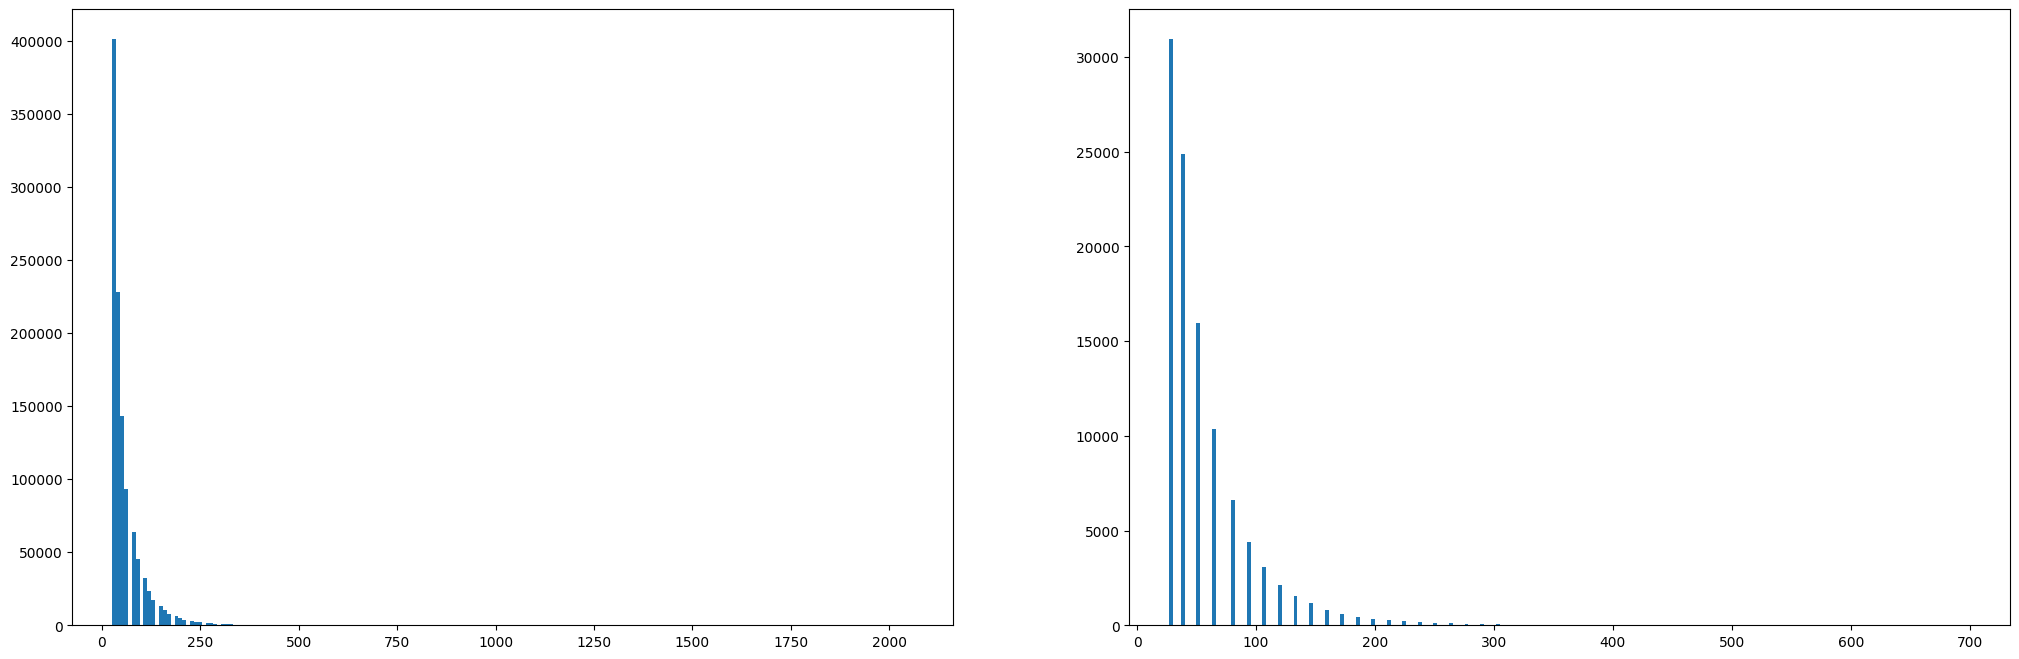

Locale: DE 
Number of products: 518327 
Number of train sessions: 1111416 
Train session lengths - Mean: 57.89 | Median 40.00 | Min: 27.00 | Max 2060.00 
Number of test sessions: 104568
Test session lengths - Mean: 57.23 | Median 40.00 | Min: 27.00 | Max 700.00 




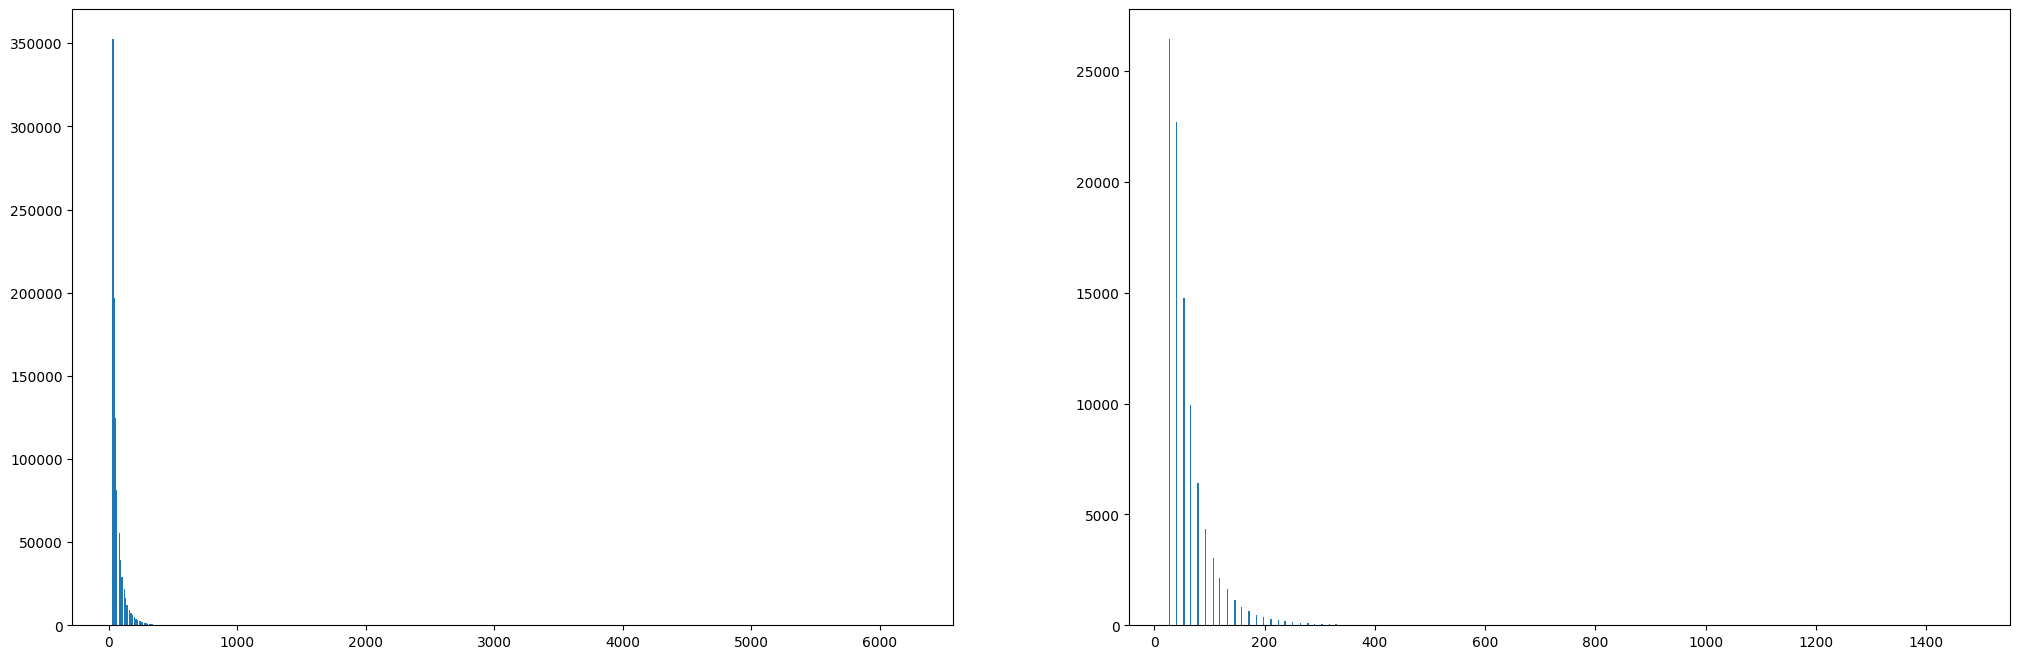

Locale: JP 
Number of products: 395009 
Number of train sessions: 979119 
Train session lengths - Mean: 59.61 | Median 40.00 | Min: 27.00 | Max 6257.00 
Number of test sessions: 96467
Test session lengths - Mean: 59.90 | Median 40.00 | Min: 27.00 | Max 1479.00 




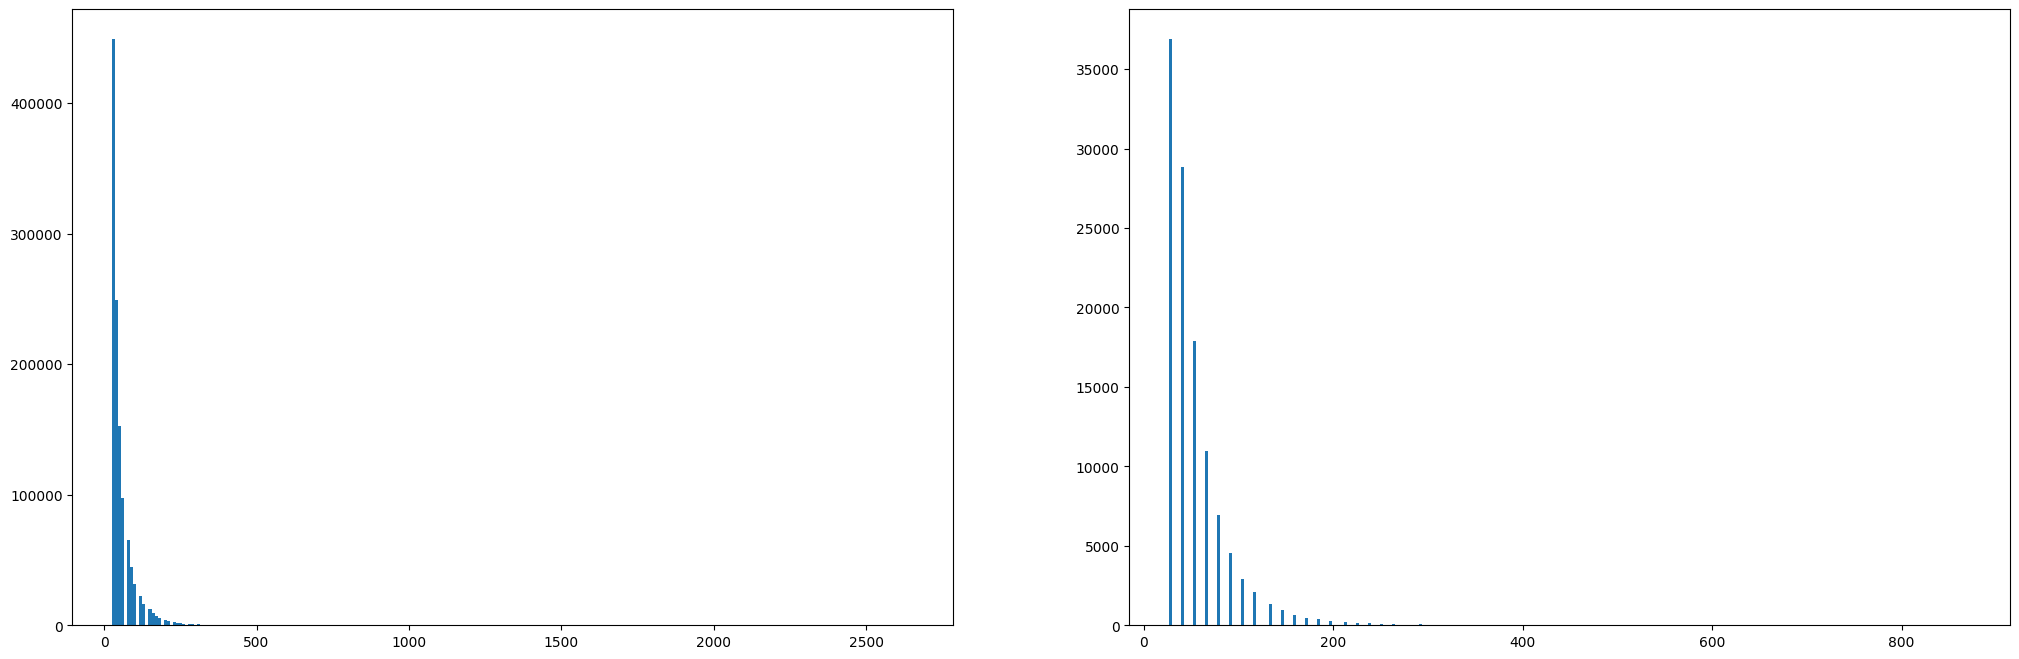

Locale: UK 
Number of products: 500180 
Number of train sessions: 1182181 
Train session lengths - Mean: 54.85 | Median 40.00 | Min: 27.00 | Max 2654.00 
Number of test sessions: 115936
Test session lengths - Mean: 53.51 | Median 40.00 | Min: 27.00 | Max 872.00 




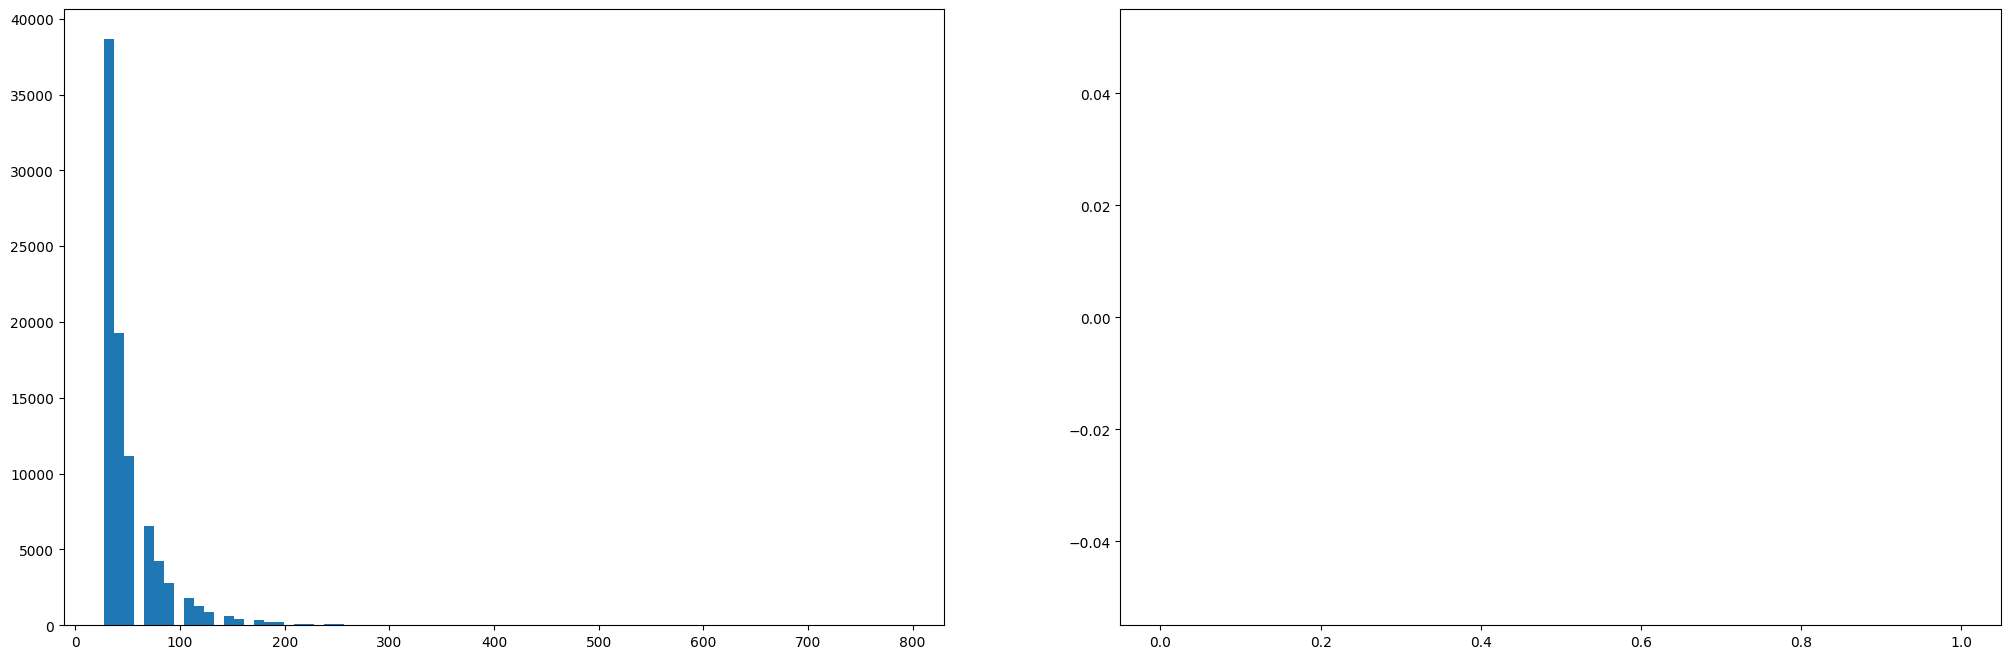

Locale: ES 
Number of products: 42503 
Number of train sessions: 89047 
Train session lengths - Mean: 48.82 | Median 40.00 | Min: 27.00 | Max 792.00 
Number of test sessions: 0



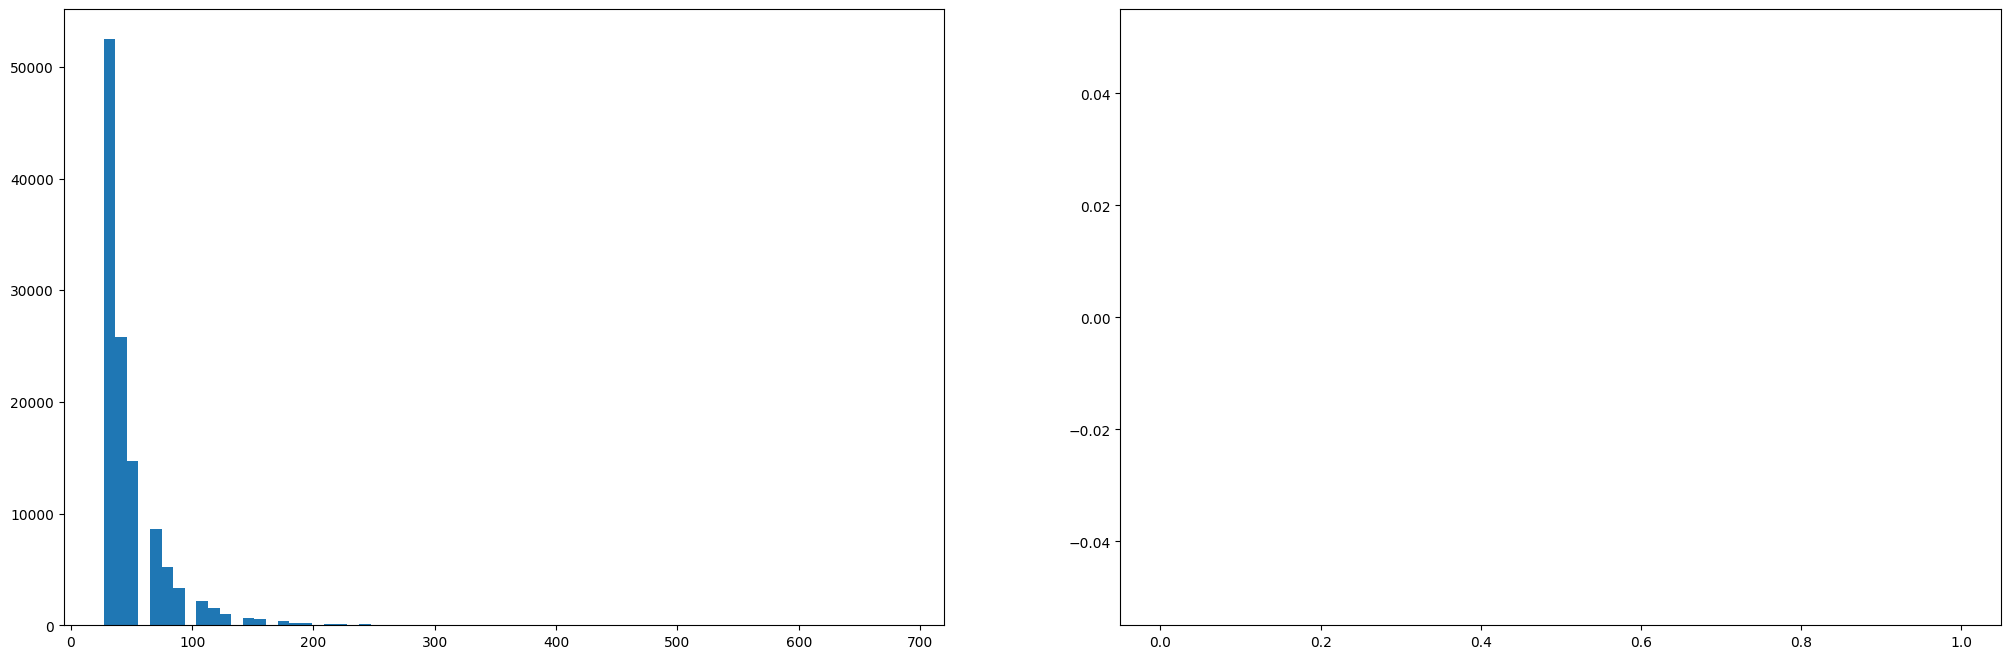

Locale: FR 
Number of products: 44577 
Number of train sessions: 117561 
Train session lengths - Mean: 47.25 | Median 40.00 | Min: 27.00 | Max 687.00 
Number of test sessions: 0



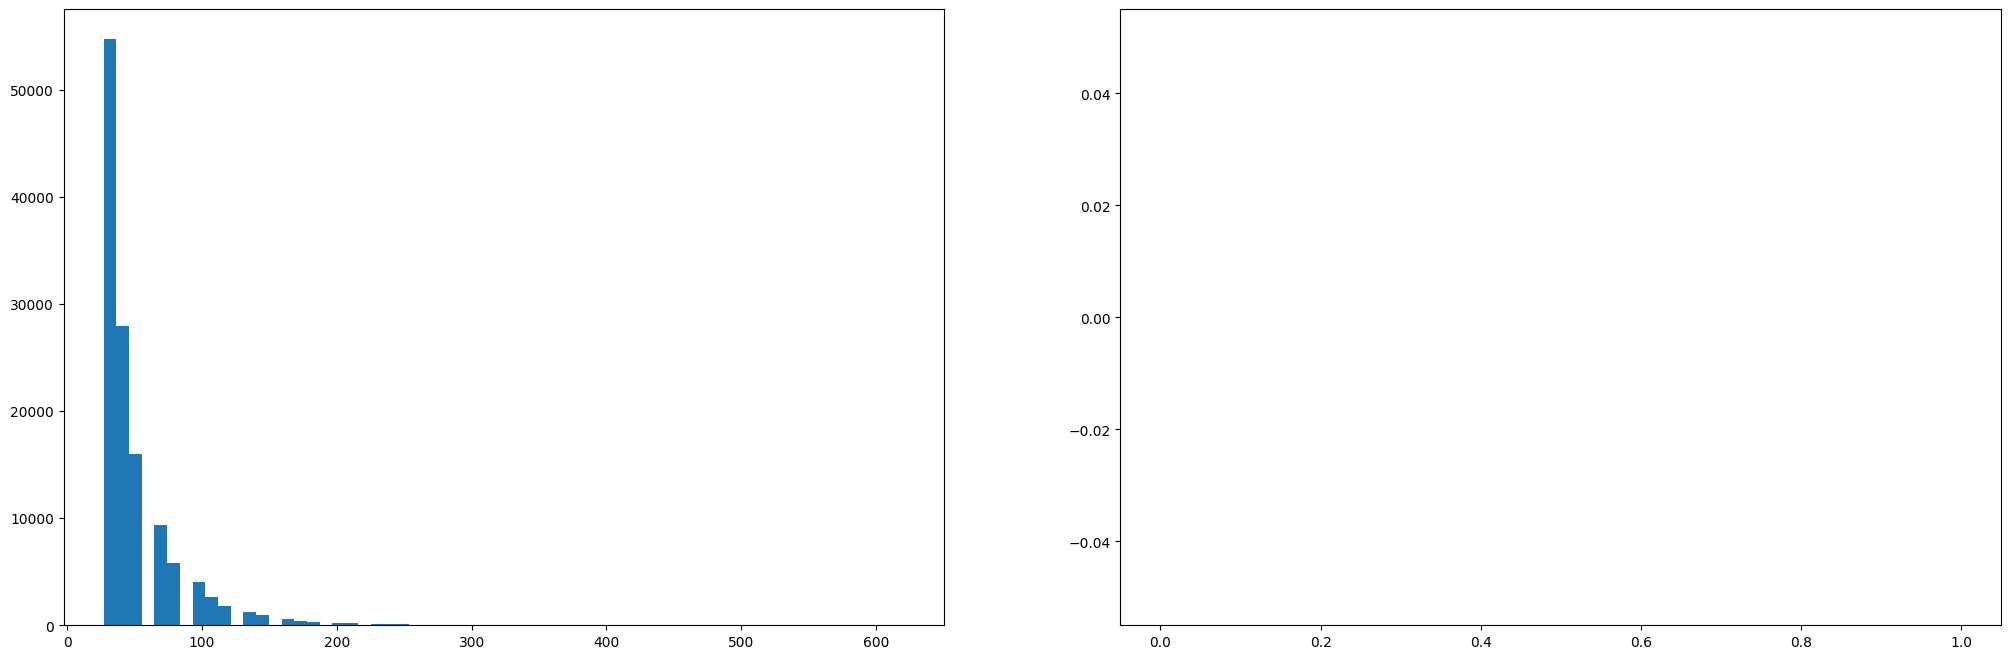

Locale: IT 
Number of products: 50461 
Number of train sessions: 126925 
Train session lengths - Mean: 48.80 | Median 40.00 | Min: 27.00 | Max 621.00 
Number of test sessions: 0



In [5]:
products = read_product_data()
locale_names = products['locale'].unique()
# show_locale_info(locale_names[0], task)
for locale in locale_names:
    show_locale_info(locale, task)

In [6]:
products.sample(5)

,id,locale,title,price,brand,color,size,model,material,author,desc
684863,B09RQMTGKC,JP,ファンケル (FANCL) (新) 大人のカロリミット 28回分 (14回分×2袋) [機能...,2620.00,FANCL,NaN,84粒(x 1),5889X2,NaN,NaN,【1回の目安】 3粒（1日1～3回） 【機能性関与成分／1回3粒当たり】 桑の葉イミノシュガ...
651248,B0B1J3ZSMZ,JP,DANNI＆TONI ジェルネイルシール 硬化タイプ 手用 長持ち無臭 防水 SGS認定 安...,1580.00,DANNI＆TONI,26. No man's land of Rose,NaN,NaN,NaN,NaN,【28pcsどんな形の爪にもピッタリのネイルシール】 ほとんどのネイルの形状とサイズにフィッ...
1135742,B07STGDP96,UK,How to Draw: Easy Techniques and Step-by-Step ...,6.05,Rockridge Press,NaN,NaN,NaN,NaN,"Baid, Aaria",NaN
330943,B09776PMSY,DE,"deleyCON 3,0m Kabelschlauch Selbstschließend K...",13.79,deleyCON,Weiß,3 M,MK4764,Nylon,NaN,Für ein optimales Kabelmanagement // Selbstsch...
789,B089KC34BV,DE,"Geschenke für Männer, BIBURY Mini Cuttermesser...",5.99,BIBURY,Auto Model,NaN,NaN,NaN,NaN,🎁 5 Ersatzklingen - Im Lieferumfang des Produk...


In [7]:
from tqdm import tqdm 
def read_locale_products(locale):
    products = read_product_data().query(f'locale == "{locale}"')
    return products

def show_locale_product_info(locale, tokenizer):
    products = read_locale_products(locale)
    if len(products) > 100000:
        products = products.sample(100000)
    product_titles = products['title']
    product_descs = products['desc']
    
    title_lens = []
    desc_lens = []
    for i in tqdm(range(len(products))):
        try:
            if not pd.isna(product_titles.iloc[i]):
                title_len = tokenizer(product_titles.iloc[i], return_length=True)['length']
            else:
                title_len = 0
            if not pd.isna(product_descs.iloc[i]):
                desc_len = tokenizer(product_descs.iloc[i], return_length=True)['length']
            else:
                desc_len = 0
            title_lens.append(title_len)
            desc_lens.append(desc_len)
        except Exception as error:
            print(f"error index : {i}")
            raise error

    title_lens = pd.Series(title_lens, dtype=np.float32)
    desc_lens = pd.Series(desc_lens, dtype=np.float32)

    # plot hist for the length of titles and descs 
    fig = plt.figure(figsize=(25, 8))
    G = gridspec.GridSpec(1, 2)
    
    title_length_hist = int(title_lens.max() - 1) // 5 + 1
    axes =fig.add_subplot(G[0, 0])
    axes.hist(title_lens, bins=title_length_hist)

    desc_length_hist = int(desc_lens.max() - 1) // 5 + 1
    axes =fig.add_subplot(G[0, 1])
    axes.hist(desc_lens, bins=desc_length_hist)
    plt.show()

    print(f"Locale: {locale} \n"
            f"Number of products: {products['id'].nunique()} \n"
            f"Product title lengths - "
            f"Mean: {title_lens.mean():.2f} | Median {title_lens.median():.2f} | "
            f"Min: {title_lens.min():.2f} | Max {title_lens.max():.2f} \n"
            f"Product description lengths - "
            f"Mean: {desc_lens.mean():.2f} | Median {desc_lens.median():.2f} | "
            f"Min: {desc_lens.min():.2f} | Max {desc_lens.max():.2f} \n"
            )
    print("cxllll")


/root/autodl-tmp/xiaolong/.conda/envs/torch12/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|██████████| 100000/100000 [01:14<00:00, 1341.26it/s]


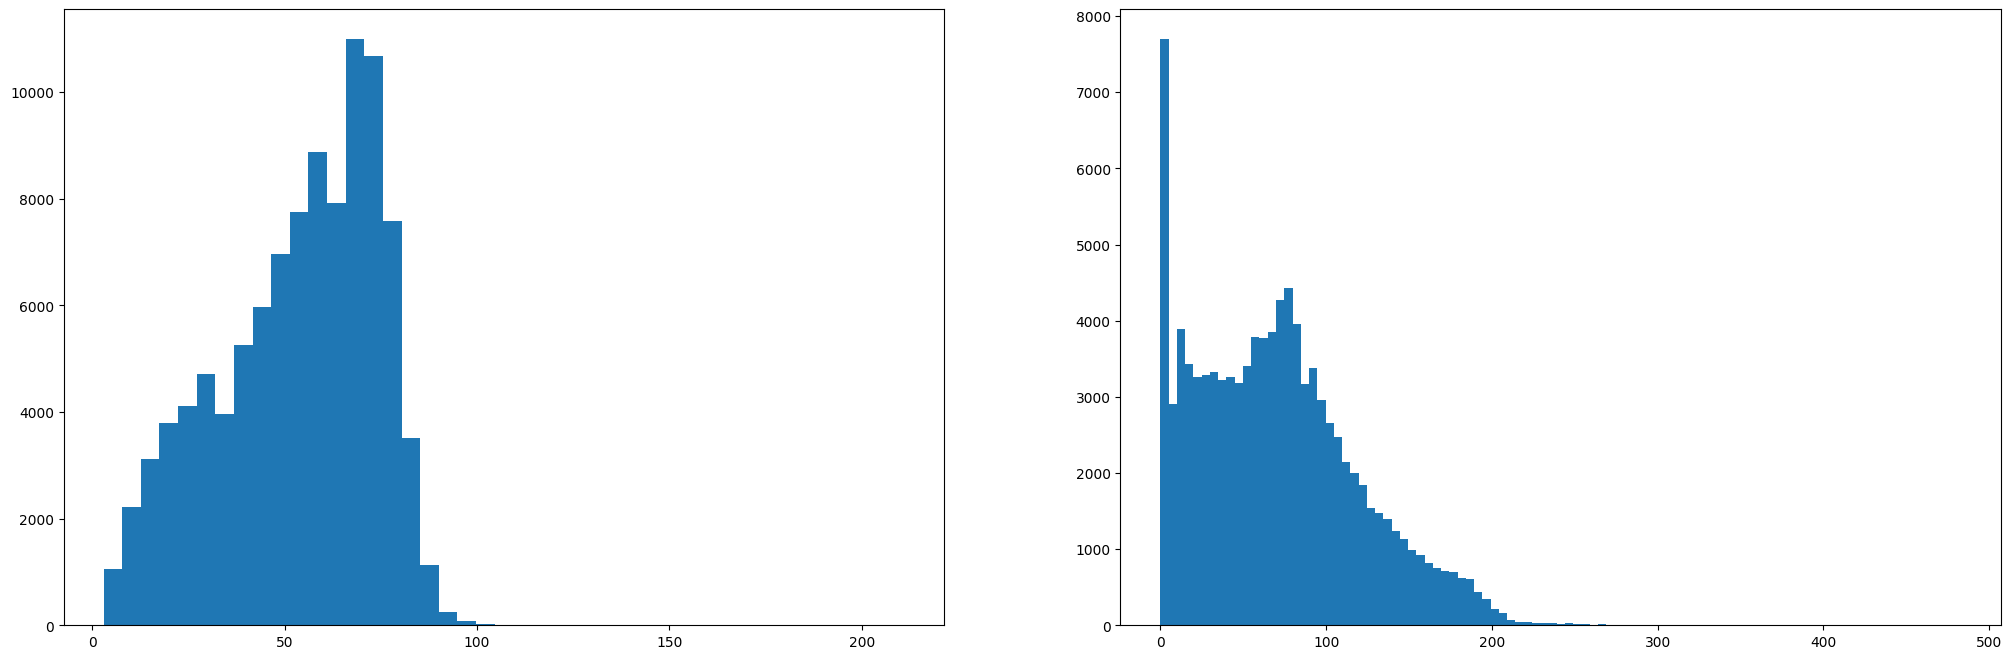

Locale: DE 
Number of products: 100000 
Product title lengths - Mean: 53.32 | Median 57.00 | Min: 3.00 | Max 211.00 
Product description lengths - Mean: 70.41 | Median 67.00 | Min: 0.00 | Max 483.00 

cxllll


100%|██████████| 100000/100000 [02:01<00:00, 820.67it/s]


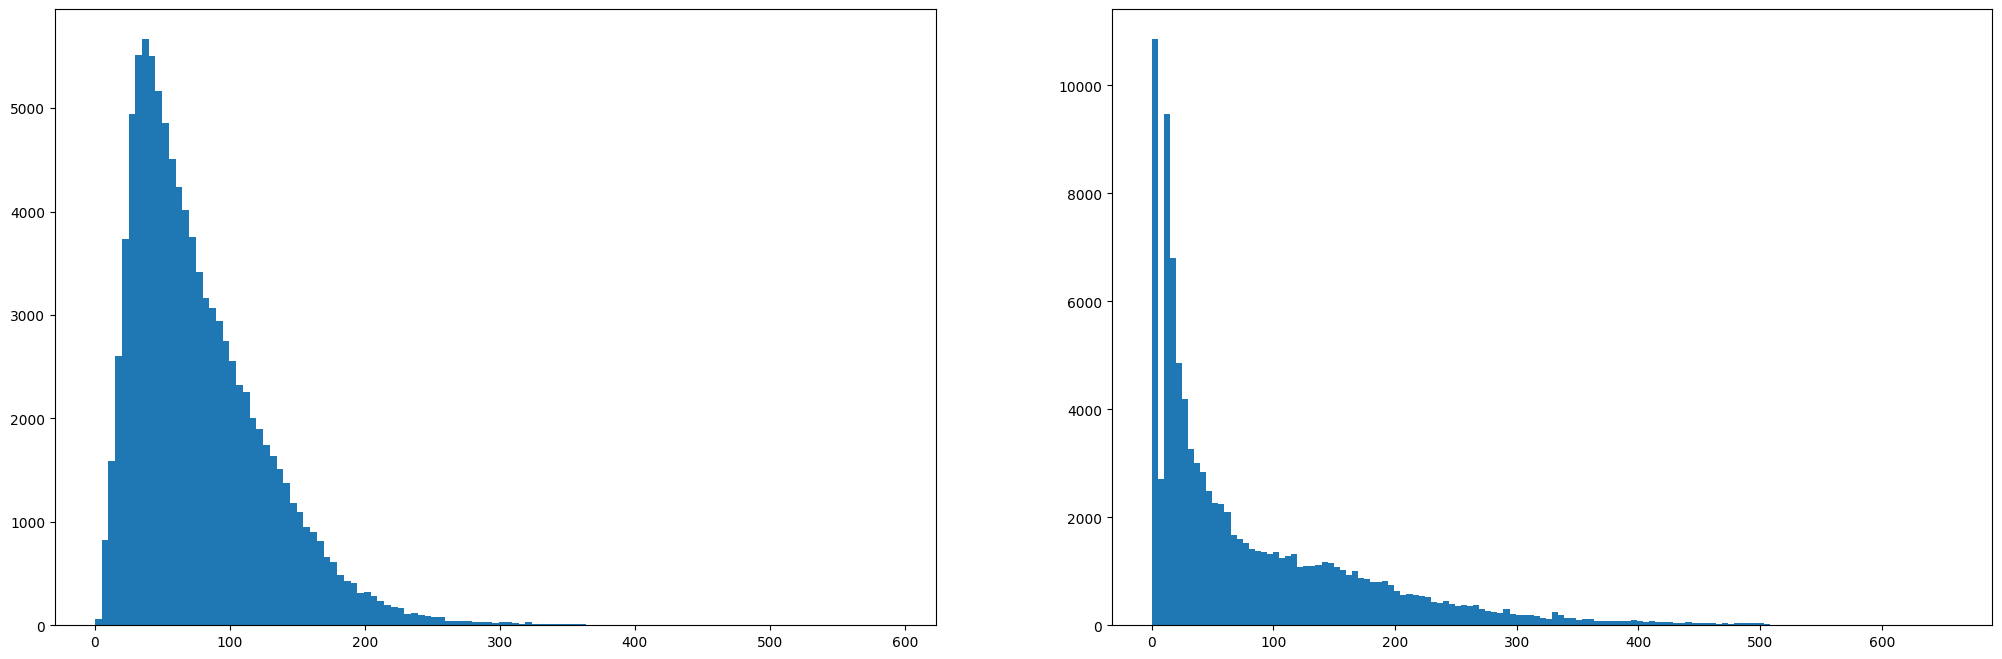

Locale: JP 
Number of products: 100000 
Product title lengths - Mean: 77.56 | Median 65.00 | Min: 0.00 | Max 593.00 
Product description lengths - Mean: 84.95 | Median 48.00 | Min: 0.00 | Max 658.00 

cxllll


100%|██████████| 100000/100000 [00:55<00:00, 1816.81it/s]


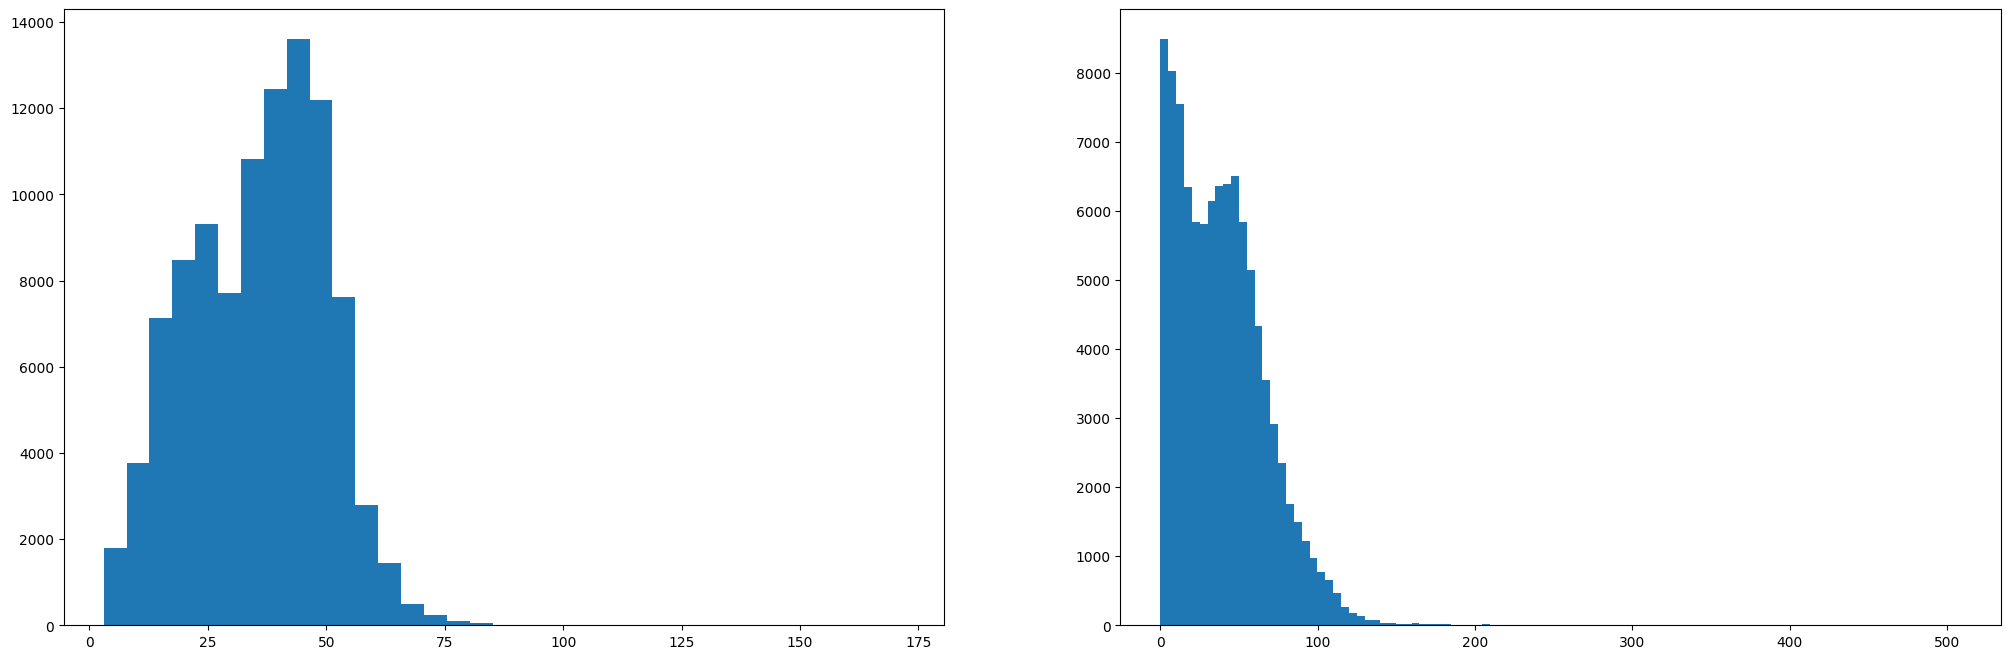

Locale: UK 
Number of products: 100000 
Product title lengths - Mean: 35.64 | Median 37.00 | Min: 3.00 | Max 172.00 
Product description lengths - Mean: 38.65 | Median 36.00 | Min: 0.00 | Max 509.00 

cxllll


100%|██████████| 42503/42503 [00:27<00:00, 1543.51it/s]


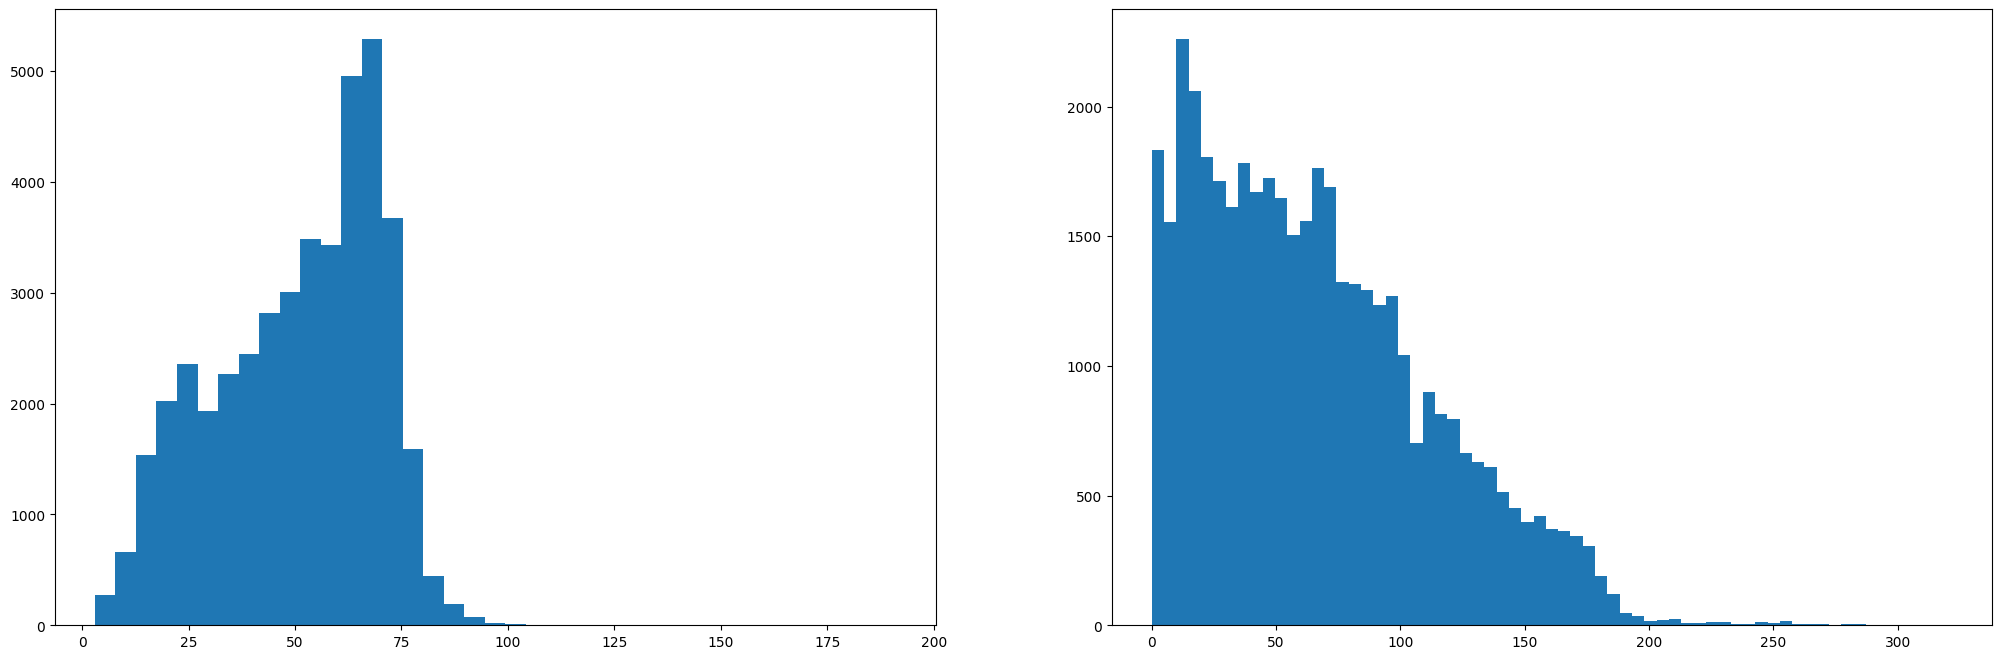

Locale: ES 
Number of products: 42503 
Product title lengths - Mean: 50.59 | Median 54.00 | Min: 3.00 | Max 191.00 
Product description lengths - Mean: 66.46 | Median 60.00 | Min: 0.00 | Max 322.00 

cxllll


100%|██████████| 44577/44577 [00:28<00:00, 1547.30it/s]


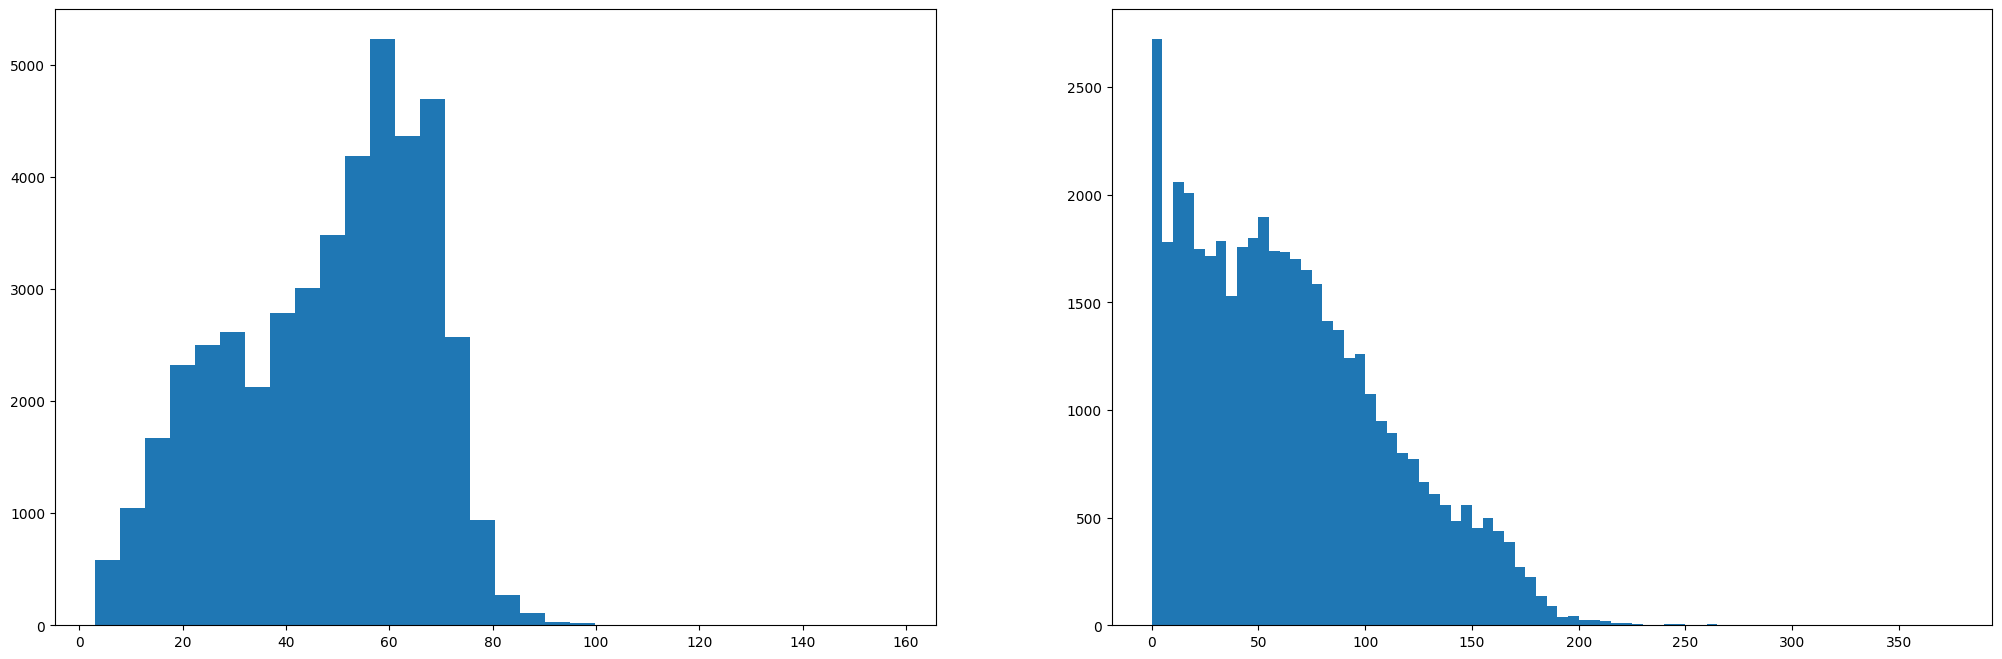

Locale: FR 
Number of products: 44577 
Product title lengths - Mean: 48.03 | Median 52.00 | Min: 3.00 | Max 158.00 
Product description lengths - Mean: 65.24 | Median 59.00 | Min: 0.00 | Max 375.00 

cxllll


100%|██████████| 50461/50461 [00:31<00:00, 1615.30it/s]


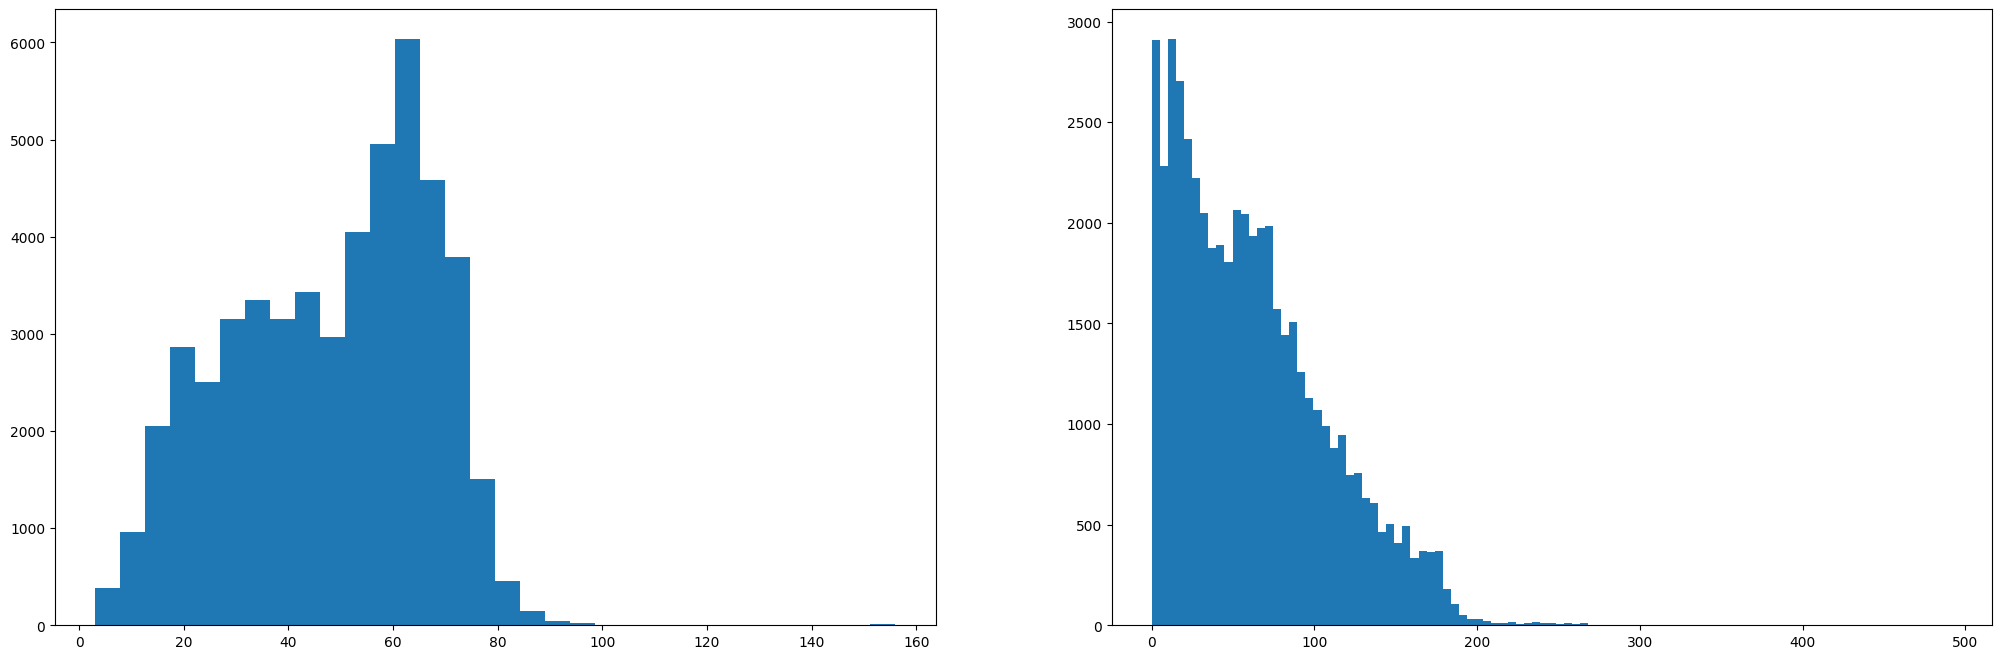

Locale: IT 
Number of products: 50461 
Product title lengths - Mean: 48.06 | Median 51.00 | Min: 3.00 | Max 156.00 
Product description lengths - Mean: 62.17 | Median 55.00 | Min: 0.00 | Max 492.00 

cxllll


In [8]:
from transformers import RobertaTokenizer, RobertaModel
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
products = read_product_data()
locale_names = products['locale'].unique()
# show_locale_product_info(locale_names[0], tokenizer)
for locale in locale_names:
    show_locale_product_info(locale, tokenizer)